# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [3]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [75]:
# Your code to explore data and train a regression model
from sklearn.linear_model import LinearRegression
data['Year'] = data['transaction_date'].astype(str).str[:4]
X,y = ['Year', 'house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude'],['price_per_unit']
# data = data.drop('Year', axis=1)
data.Year = data.Year.astype(int)
data

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,Year
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012
...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,2013
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,2012
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,2013
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,2013


### Find Outliers

C:\Users\Baljo\AppData\Local\Temp/ipykernel_3396/119626670.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


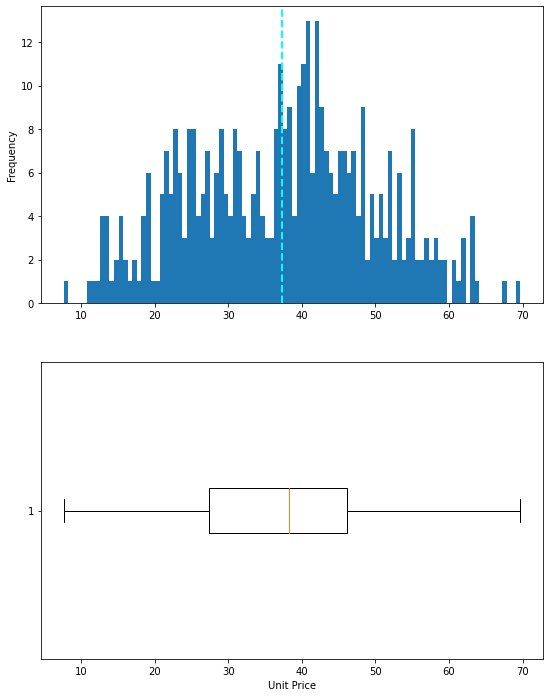

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(2,1, figsize = (9,12))
ax[0].hist(data[y[0]], bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(data[y[0]].mean(), color='cyan', linestyle='dashed',linewidth=2)
ax[1].boxplot(data[y[0]], vert=False)
ax[1].set_xlabel("Unit Price")
fig.show()


### Remove the Outliers

C:\Users\Baljo\AppData\Local\Temp/ipykernel_3396/1064923321.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


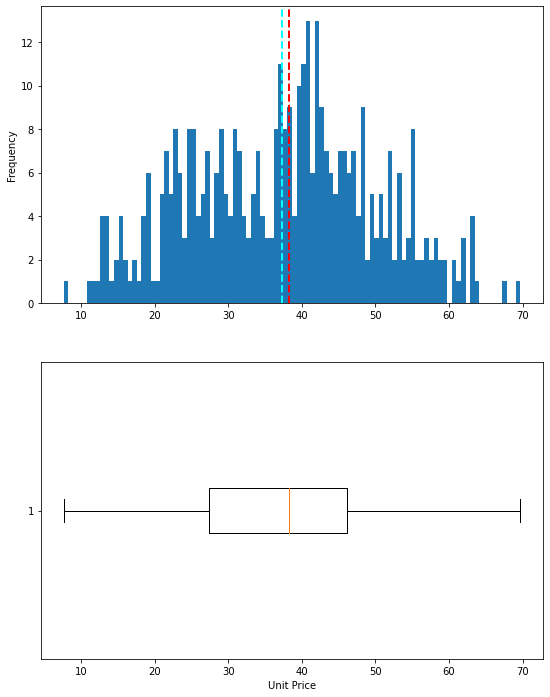

In [70]:
data = data[data.price_per_unit < 70]

fig,ax = plt.subplots(2,1, figsize = (9,12))
ax[0].hist(data[y[0]], bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(data[y[0]].mean(), color='cyan', linestyle='dashed',linewidth=2)
ax[0].axvline(data[y[0]].median(), color='red', linestyle='dashed',linewidth=2)
ax[1].boxplot(data[y[0]], vert=False)
ax[1].set_xlabel("Unit Price")
fig.show()


### Label vs Feature Correlation

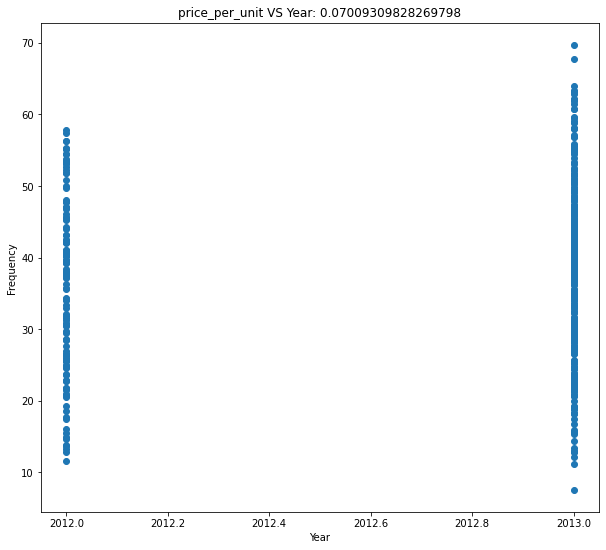

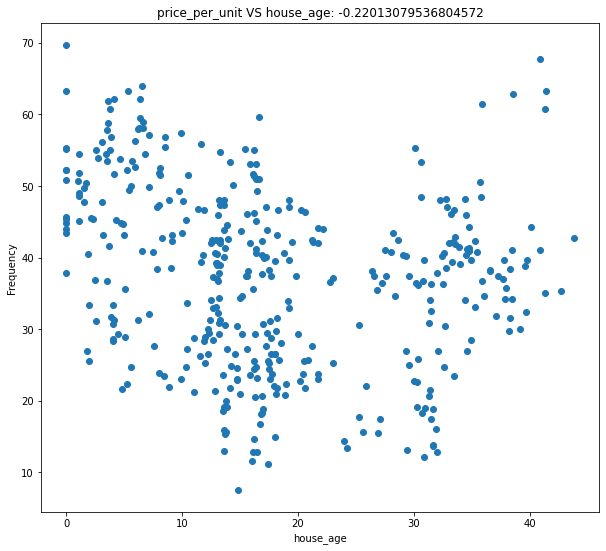

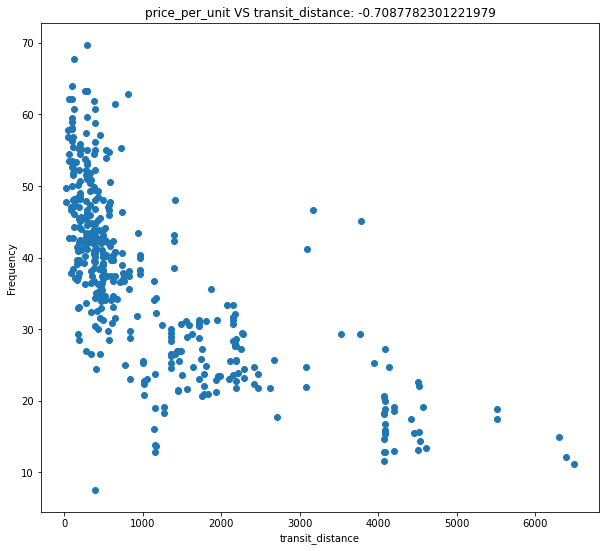

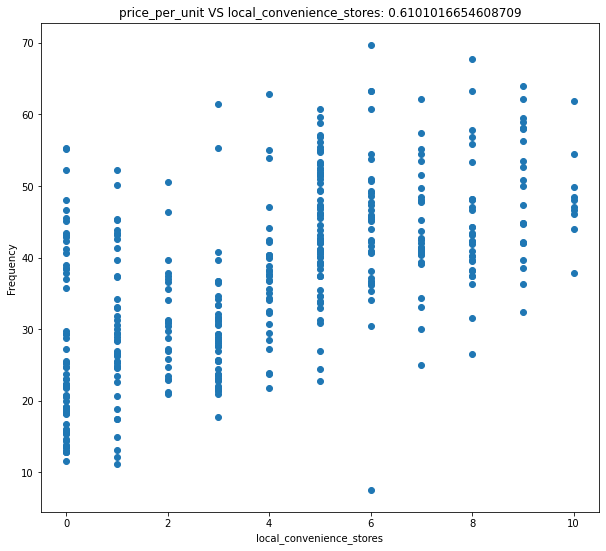

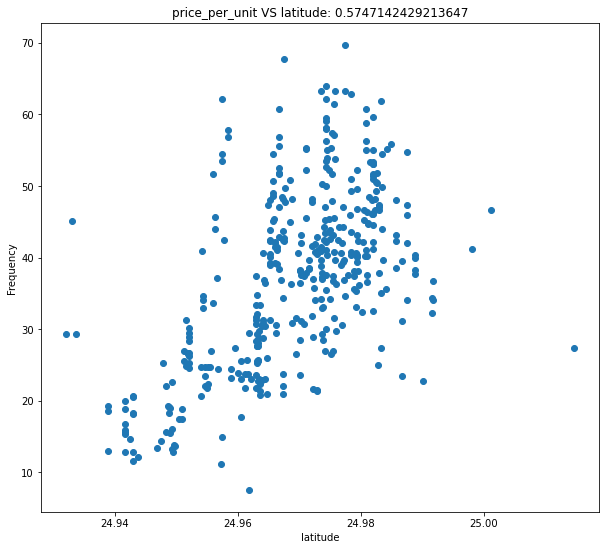

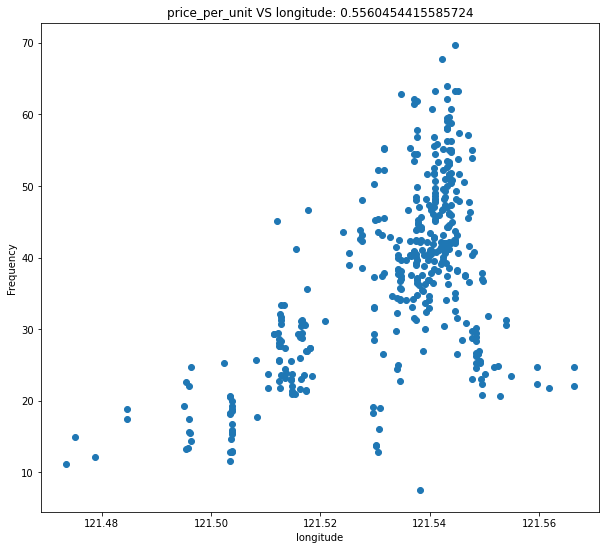

In [79]:
label = data[y[0]]

for col in X:
    correlation = data[col].corr(label)
    fig = plt.figure(figsize=(10,9))
    plt.scatter(x=data[col], y=label)
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.title(y[0] + " VS " + col + ": " + str(correlation))
plt.show()

### Label Cateogorical and Numerical Data

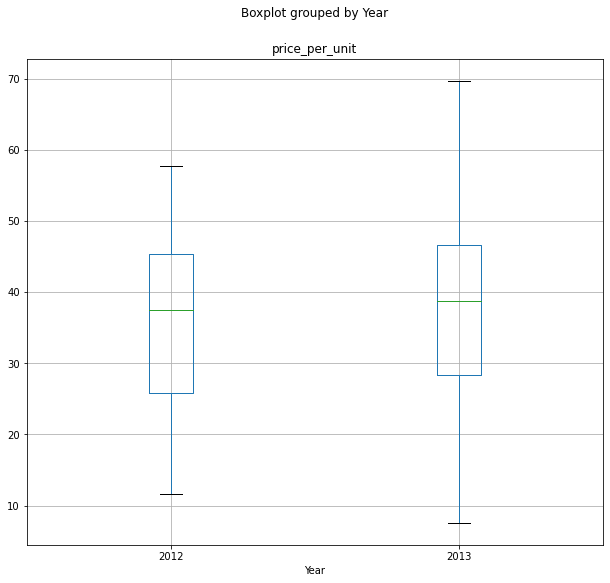

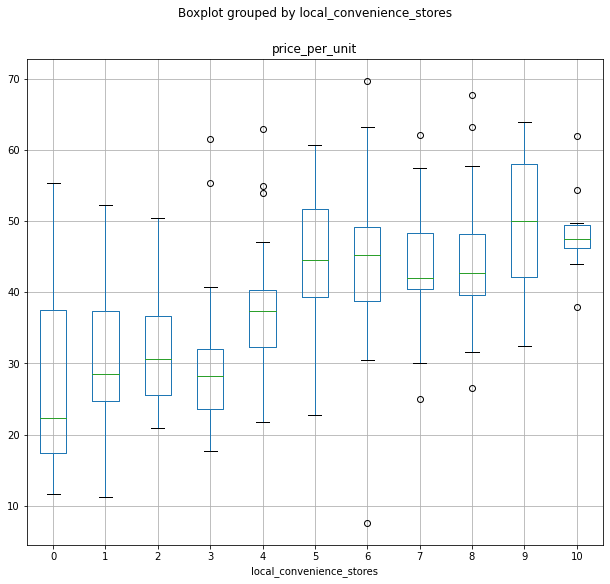

In [85]:
#From the plots above, Year and local_convenience_stores are categorical
for col in data[['Year','local_convenience_stores']]:
    fig = plt.figure(figsize=(10,9))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by=col, ax=ax)
plt.show()    

### Split Data for Training

In [98]:
from sklearn.model_selection import train_test_split
#Features and Label we will use
X, y = data[data.columns[1:-2]].values, data[data.columns[-2]].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)



### Create Pipeline

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

numeric_feat = [0,1,3,4]
numeric_transform = Pipeline(steps=[('scaler',StandardScaler())])

preprocess = ColumnTransformer(transformers=[('num', numeric_transform, numeric_feat),])

pipeline = Pipeline(steps=[('preprocessor', preprocess), ('regressor', RandomForestRegressor())])

model = pipeline.fit(X_train, (y_train))

print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


### Use and Predict Model

MSE:  36.74076207519676
RMSE:  6.0614158474070035
R2:  0.6864894176615164


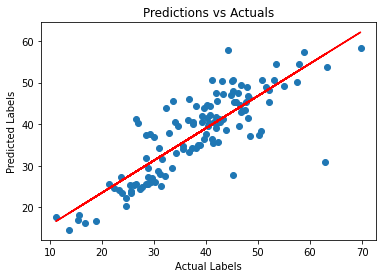

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [105]:
# Your code to use the trained model
import joblib

filename = './real_estate_model.pkl'
joblib.dump(model, filename)

loaded_model = joblib.load(filename)

X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
49.2
16.85
